In [7]:
from google.colab import drive
import os
drive.mount('/gdrive')
%cd /gdrive
%cd /gdrive/My Drive/Colab Notebooks/dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive
/gdrive/My Drive/Colab Notebooks/dataset


In [0]:
x=pd.read_csv('logistic_x.txt',sep='\ +',header=None,engine='python')
y=pd.read_csv('logistic_y.txt',sep='\ +',header=None,engine='python')
y=y.astype(int)
x['label']=y[0].values

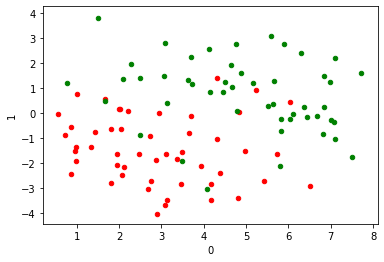

In [9]:
axs=plt.axes()
x.query('label==-1').plot.scatter(x=0,y=1,ax=axs,color='red')
x.query('label==1').plot.scatter(x=0,y=1,ax=axs,color='green')

In [0]:
xs=x[[0,1]].values
ys=x['label'].values
xs=np.hstack([np.ones([xs.shape[0],1]),xs])

In [11]:
thetas=[]
theta=np.zeros([xs.shape[1]])
loss=1e9
iteration=0
while loss>1e-6:
  zs=ys*xs.dot(theta)
  #print(zs)
  gz=1/(1+np.exp(-zs))
  hessian=np.zeros([xs.shape[1],xs.shape[1]])
  for i in range(xs.shape[1]):
    for j in range(xs.shape[1]):
      if(i>=j):
        hessian[i][j]=np.mean(gz*(1-gz)*xs[:,i]*xs[:,j])
        if(i!=j):
          hessian[j][i]=hessian[i][j]
  old_theta=theta.copy()
  gradient=np.mean((gz-1)*ys*xs.T,axis=1)
  theta-=np.linalg.inv(hessian).dot(gradient)
  thetas.append(theta.copy())
  loss=np.sum(np.abs(theta-old_theta))
  iteration+=1
print(iteration)

7


[0.57079941 7.7054006 ]


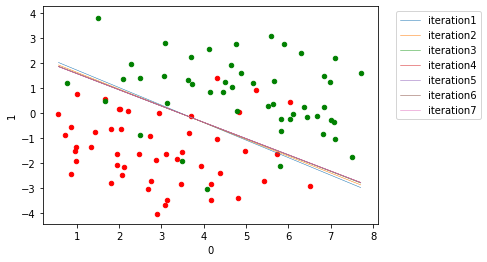

In [12]:
axs=plt.axes()
x.query('label==-1').plot.scatter(x=0,y=1,ax=axs,color='red')
x.query('label==1').plot.scatter(x=0,y=1,ax=axs,color='green')
px=np.array([np.min(xs[:,1]),np.max(xs[:,1])])
for k,theta in enumerate(thetas):
  py=(theta[0]+theta[1]*px)/(-theta[2])
  plt.plot(px,py,label='iteration{0}'.format(k+1),lw=0.5)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
print(px)